In [158]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
tqqq = pd.read_csv('./data/stock/tqqq/TQQQ.csv')

In [160]:
tqqq.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2795,2021-03-22,88.290001,92.870003,88.290001,91.089996,91.089996,35275300
2796,2021-03-23,92.050003,93.230003,89.169998,89.900002,89.900002,46945200
2797,2021-03-24,91.089996,91.120003,85.250000,85.360001,85.360001,47620900
2798,2021-03-25,83.820000,86.180000,81.650002,84.900002,84.900002,59968600
2799,2021-03-26,84.720001,88.970001,83.529999,88.650002,88.650002,53680500


In [161]:
train_data = tqqq.loc[:len(tqqq)/4 * 3 - 1].set_index('Date')

In [162]:
test_data = tqqq.loc[len(tqqq)/4 * 3:].set_index('Date')

In [163]:
train_data.shape

(2100, 6)

In [164]:
test_data.shape

(700, 6)

In [165]:
from sklearn import preprocessing

In [166]:
sc = preprocessing.StandardScaler()
train_data_scaled = sc.fit_transform(train_data.values)

In [167]:
train_data_scaled

array([[-0.94420732, -0.93780769, -0.94257658, -0.93688703, -0.93679734,
        -1.68473972],
       [-0.94023294, -0.93691399, -0.93886365, -0.93638106, -0.93629163,
        -1.55703411],
       [-0.93344536, -0.93294355, -0.93327163, -0.93157471, -0.9314876 ,
        -1.5317789 ],
       ...,
       [ 3.28784865,  3.28104956,  3.35270979,  3.33718139,  3.3371201 ,
        -1.17675651],
       [ 3.35500996,  3.36544019,  3.38689898,  3.33218162,  3.33212054,
        -0.87398183],
       [ 3.39645007,  3.41677782,  3.46473361,  3.46574658,  3.46567954,
        -0.64806481]])

In [168]:
timeframe = 30

x_train = []
y_train = []

for i in range(timeframe, len(train_data_scaled)):
    x_train.append(train_data_scaled[i-timeframe:i])
    y_train.append(train_data_scaled[i])

x_train, y_train = np.array(x_train), np.array(y_train)

In [169]:
x_train.shape

(2070, 30, 6)

In [170]:
y_train.shape

(2070, 6)

In [171]:
x_train

array([[[-0.94420732, -0.93780769, -0.94257658, -0.93688703,
         -0.93679734, -1.68473972],
        [-0.94023294, -0.93691399, -0.93886365, -0.93638106,
         -0.93629163, -1.55703411],
        [-0.93344536, -0.93294355, -0.93327163, -0.93157471,
         -0.9314876 , -1.5317789 ],
        ...,
        [-0.8963816 , -0.89600803, -0.89609709, -0.8941212 ,
         -0.89405217, -1.08385624],
        [-0.8952653 , -0.89716544, -0.89464223, -0.89648709,
         -0.89641697, -0.66309484],
        [-0.89245195, -0.89301919, -0.89476342, -0.8975139 ,
         -0.89744328, -0.6049602 ]],

       [[-0.94023294, -0.93691399, -0.93886365, -0.93638106,
         -0.93629163, -1.55703411],
        [-0.93344536, -0.93294355, -0.93327163, -0.93157471,
         -0.9314876 , -1.5317789 ],
        [-0.92982837, -0.93105348, -0.9295587 , -0.92938739,
         -0.9293013 , -1.29447519],
        ...,
        [-0.8952653 , -0.89716544, -0.89464223, -0.89648709,
         -0.89641697, -0.66309484],
  

In [172]:
y_train

array([[-0.89516112, -0.89577356, -0.896385  , -0.89666565, -0.89659546,
        -0.72456508],
       [-0.89416385, -0.8949824 , -0.89271761, -0.89441876, -0.89434961,
        -1.2982873 ],
       [-0.89301768, -0.89351724, -0.89317225, -0.89267784, -0.89260947,
        -1.27541465],
       ...,
       [ 3.28784865,  3.28104956,  3.35270979,  3.33718139,  3.3371201 ,
        -1.17675651],
       [ 3.35500996,  3.36544019,  3.38689898,  3.33218162,  3.33212054,
        -0.87398183],
       [ 3.39645007,  3.41677782,  3.46473361,  3.46574658,  3.46567954,
        -0.64806481]])

In [173]:
model = tf.keras.models.Sequential()

# first LSTM layer
model.add(tf.keras.layers.LSTM(units=timeframe, activation='relu', return_sequences=True, input_shape=(timeframe, 6)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=timeframe, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=timeframe + 20, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=timeframe + 40, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(6))

In [174]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 30, 30)            4440      
_________________________________________________________________
dropout_16 (Dropout)         (None, 30, 30)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 30, 30)            7320      
_________________________________________________________________
dropout_17 (Dropout)         (None, 30, 30)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 30, 50)            16200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 30, 50)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 70)               

In [175]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [176]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
65/65 [==============================] - 5s 33ms/step - loss: 0.5345
Epoch 2/10
65/65 [==============================] - 2s 30ms/step - loss: 0.2943
Epoch 3/10
65/65 [==============================] - 2s 29ms/step - loss: 0.2508
Epoch 4/10
65/65 [==============================] - 2s 29ms/step - loss: 0.2395
Epoch 5/10
65/65 [==============================] - 2s 30ms/step - loss: 0.2229
Epoch 6/10
65/65 [==============================] - 2s 28ms/step - loss: 0.2216
Epoch 7/10
65/65 [==============================] - 2s 31ms/step - loss: 0.2102
Epoch 8/10
65/65 [==============================] - 2s 30ms/step - loss: 0.2097
Epoch 9/10
65/65 [==============================] - 2s 29ms/step - loss: 0.2041
Epoch 10/10
65/65 [==============================] - 2s 28ms/step - loss: 0.1894


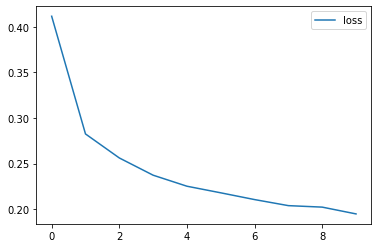

In [177]:
pd.DataFrame(history.history).plot()

In [204]:
# Prediction

dataset_total = pd.concat((train_data, test_data), axis = 0)

inputs = dataset_total[len(dataset_total) - len(test_data) - timeframe:].values

inputs = sc.fit_transform(inputs)

x_test = []
for i in range(timeframe, len(test_data) + timeframe):
    x_test.append(inputs[i-timeframe:i])

x_test = np.array(x_test)
x_test.shape

(700, 30, 6)

In [188]:
predicted_stock = model.predict(x_test)
predicted_stock = sc.inverse_transform(predicted_stock)
predicted_stock = pd.DataFrame(predicted_stock)

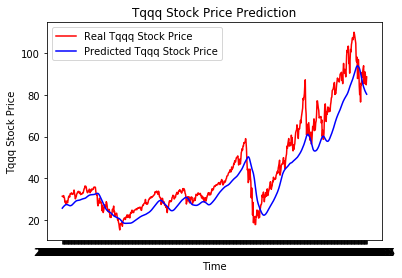

In [182]:
real_stock_price = test_data.iloc[:, 3]
predicted_stock_price = predicted_stock.iloc[:, 3]

# plot
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Tqqq Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Tqqq Stock Price')
plt.title('Tqqq Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tqqq Stock Price')
plt.legend()
plt.show()

In [191]:
test_data[-30:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-12,107.580002,110.300003,106.440002,110.110001,110.110001,19330400
2021-02-16,110.959999,111.860001,108.080002,109.190002,109.190002,22165900
2021-02-17,106.230003,107.940002,104.010002,107.669998,107.669998,26496700
2021-02-18,104.059998,106.959999,102.279999,106.220001,106.220001,27550500
2021-02-19,107.639999,107.680000,103.860001,104.820000,104.820000,23344300
2021-02-22,100.540001,101.800003,96.500000,96.699997,96.699997,33183700
2021-02-23,91.779999,97.360001,86.419998,95.839996,95.839996,49818700
2021-02-24,93.239998,98.470001,90.900002,98.150002,98.150002,30760500
2021-02-25,95.620003,98.070000,86.449997,87.900002,87.900002,59448000


In [210]:
# Prediction
inputs = test_data[-30:].values

inputs = sc.fit_transform(inputs)

x_test = np.array(inputs)
x_test = np.reshape(x_test, (-1, 30, 6))
x_test.shape

(1, 30, 6)

In [211]:
predicted_stock = model.predict(x_test)
predicted_stock = sc.inverse_transform(predicted_stock)
predicted_stock = pd.DataFrame(predicted_stock)

In [215]:
predicted_stock

,0,1,2,3,4,5
0,88.266472,90.775589,84.581894,87.332649,87.466805,46613624.0
